### Калинников Сергей Юрьевич. Вариант 8
Астронавты (космонавты)
1. Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе, постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.
2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.
3. Определите количество военных и гражданских астронавтов.
4. Определите наиболее часто встречающееся среди астронавтов военное звание.
5. Определите количество женщин среди астронавтов
6. Удалите из набора данных астронавтов, для которых не указан бакалавриат.
7. Определите количество астронавтов, родом из Техаса.
8. Определите количество миссий, в ходе выполнений которых погибли астронавты.
9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [30]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from pylab import rcParams
rcParams['figure.figsize'] = 22, 8
df = pd.read_csv('astronauts.csv')

#### 1. Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе, постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.

    1.Астронавт, который провёл наибольшее количество времени в открытом космосе

In [31]:
df[df['Space Walks (hr)'].max() == df['Space Walks (hr)']]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
203,Michael E. Lopez-Alegria,1992.0,14.0,Retired,5/30/1958,"Madrid, Spain",Male,US Naval Academy; US Naval Postgraduate School,Systems Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,6190,10,67.0,"STS-73 (Columbia), STS-92 (Discovery), STS-113...",NaN,NaN


    2.График

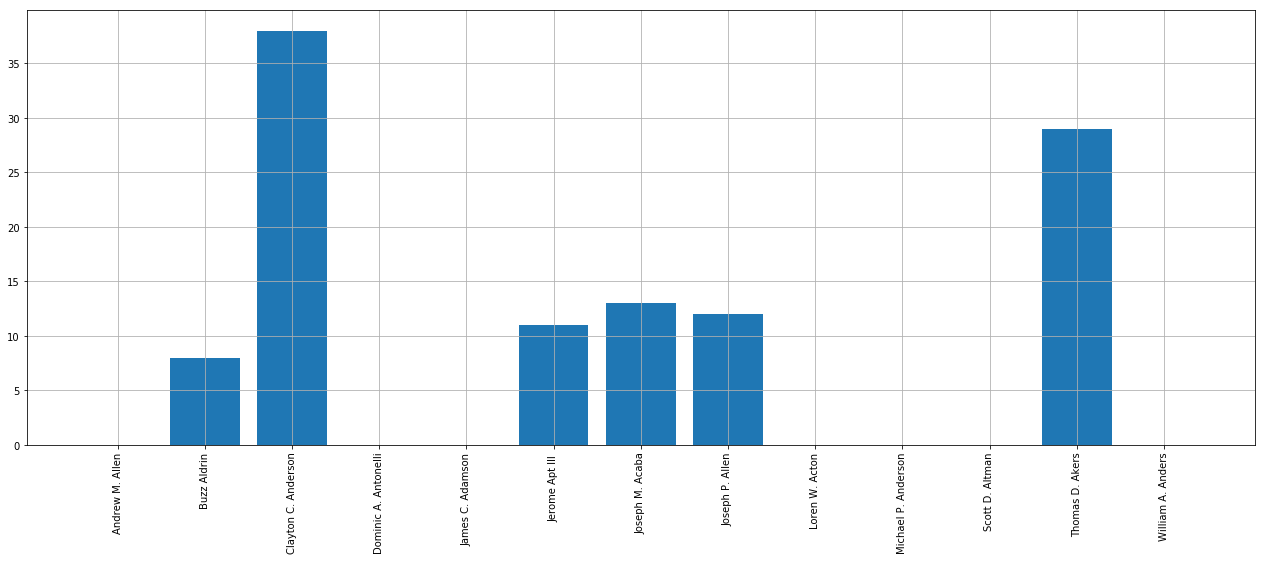

In [29]:
plt.bar(df.head(13)['Name'], df.head(13)['Space Walks (hr)'], align='center')
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

#### 2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.

US Naval Academy    52
dtype: int64
-------


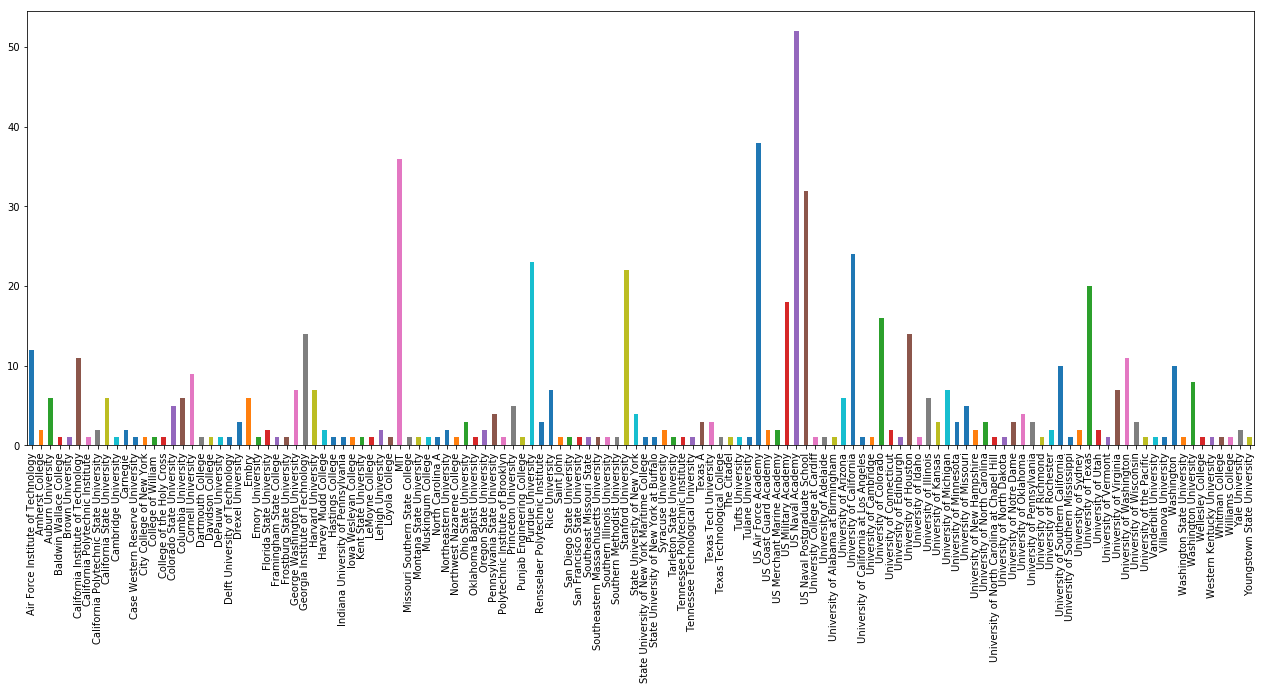

In [32]:
universitets = [x for x in df[df['Alma Mater'].notnull()]['Alma Mater']]
univer_set = set()
for x in universitets:
    for un in re.findall(r'^\w[\w ]*',x):
        univer_set.add(un)
dictionary = {x: 0 for x in univer_set}
for uniq_universitet in univer_set:
    for univer_for_list in universitets:
        if(uniq_universitet in univer_for_list):
            dictionary[uniq_universitet] += 1
my_series = pd.Series(dictionary)
print(my_series[my_series==my_series.max()])
print('-------')
my_series.plot(kind='bar',rot=90)

#### 3. Определите количество военных и гражданских астронавтов.

In [33]:
astronauts = pd.Series({'Military astronauts' : df['Military Rank'].count(),
                       'Civil astronauts' : df[df['Military Rank'].isnull()]['Name'].count()})
print(astronauts)

Civil astronauts       150
Military astronauts    207
dtype: int64


#### 4. Определите наиболее часто встречающееся среди астронавтов военное звание.

In [34]:
ranks = df.groupby('Military Rank')['Name'].count()
print(ranks.describe())
print('----------')
print(ranks[ranks == ranks.max()])

count    12.000000
mean     17.250000
std      30.502235
min       1.000000
25%       2.000000
50%       4.000000
75%      10.750000
max      94.000000
Name: Name, dtype: float64
----------
Military Rank
Colonel    94
Name: Name, dtype: int64


#### 5. Определите количество женщин среди астронавтов

In [35]:
gender = df.groupby('Gender')['Name'].count()
print(gender)
print('------')
print('Number Female: ')
print(gender['Female'])

Gender
Female     50
Male      307
Name: Name, dtype: int64
------
Number Female: 
50


#### 6.Удалите из набора данных астронавтов, для которых не указан бакалавриат.

In [36]:
df = df[df['Undergraduate Major'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 356
Data columns (total 19 columns):
Name                   335 non-null object
Year                   310 non-null float64
Group                  310 non-null float64
Status                 335 non-null object
Birth Date             335 non-null object
Birth Place            335 non-null object
Gender                 335 non-null object
Alma Mater             335 non-null object
Undergraduate Major    335 non-null object
Graduate Major         280 non-null object
Military Rank          191 non-null object
Military Branch        194 non-null object
Space Flights          335 non-null int64
Space Flight (hr)      335 non-null int64
Space Walks            335 non-null int64
Space Walks (hr)       335 non-null float64
Missions               315 non-null object
Death Date             47 non-null object
Death Mission          15 non-null object
dtypes: float64(3), int64(3), object(13)
memory usage: 52.3+ KB


#### 7. Определите количество астронавтов, родом из Техаса.

In [37]:
astr_from_TX = df[df['Birth Place'].str.contains('TX')]['Name'].count()
print('Astronauts from Texas:')
print(astr_from_TX)

Astronauts from Texas:
18


#### 8. Определите количество миссий, в ходе выполнений которых погибли астронавты.

In [38]:
death_missions = df['Death Mission'].drop_duplicates().count()
print('Death Missions:')
print(death_missions)

Death Missions:
3


#### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

                Len Gender  Count Missions
Len Gender         1.00000         0.01933
Count Missions     0.01933         1.00000
p-value
(0.01933016833034484, 0.7325431934753435)


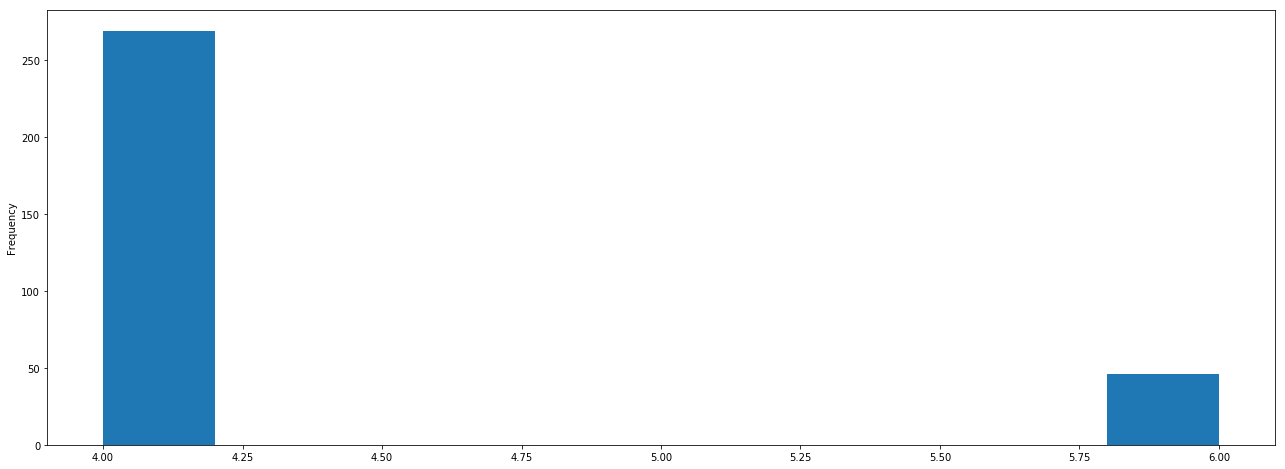

In [39]:
def get_len_gender(gender):
    return len(gender)

missions = df[df['Missions'].notnull()][['Gender','Missions']]
count_missions = []

for x in missions['Missions']:
    count_missions.append(len(x.split(',')))
missions['Count Missions'] = count_missions
len_gender = missions['Gender'].apply(get_len_gender)
missions['Len Gender'] = len_gender


print(missions[['Len Gender', 'Count Missions']].corr(method = 'pearson'))
missions['Len Gender'].plot.hist(bins=10)
print('p-value')
pValueValues = missions[['Len Gender', 'Count Missions']]
pValueValues = pValueValues[(pValueValues['Len Gender'] > 0) & (pValueValues['Count Missions'] > 0)]
print(pearsonr(pValueValues['Len Gender'], pValueValues['Count Missions']))

                Len Gender  Count Missions
Len Gender        1.000000        0.021985
Count Missions    0.021985        1.000000


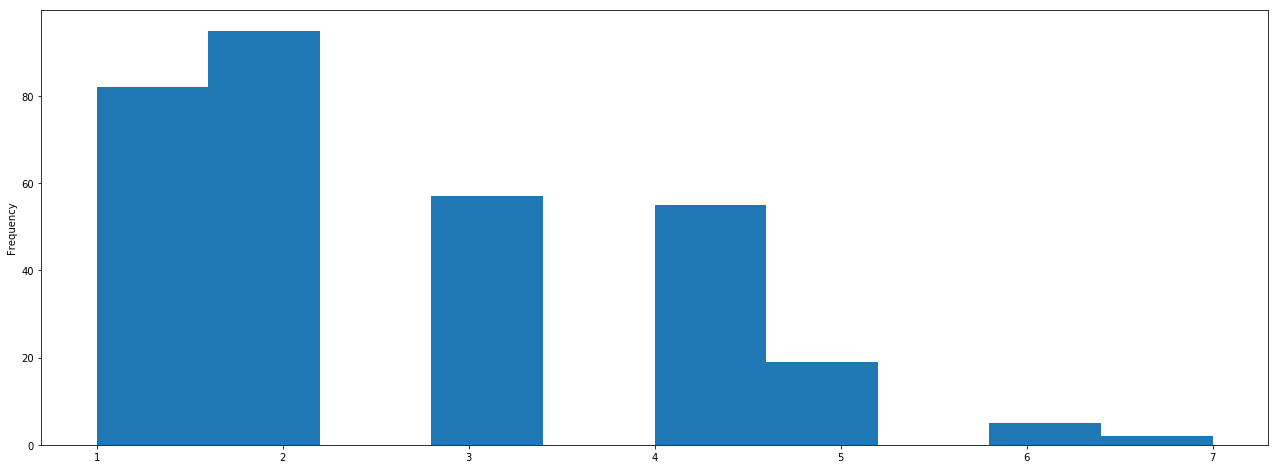

In [40]:
print(missions[['Len Gender', 'Count Missions']].corr(method = 'spearman'))
missions['Count Missions'].plot.hist(bins = 10)